# Machine Learning Model (1) - Linear Regression 

This notebook aims to apply a Machine Learning model, Linear Regression, on the following splitted datasets:
- new_train_data.csv
- splitted_train_data.csv
- splitted_cv_data.csv

This is to evaluate which of the chosen predictor variables in the original dataset is best at predicting the following response variables.

Predictor variables:
- Education
- Marital_Status
- HaveChild
- YearRange
- Income
- TotalChild
- NumWebVisitsMonth

Response variables:
- MntGroceryProducts
- TotalPurchase
- MntWines
- MntGoldProds

# Importing Relevant Modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

# References (under construction)

- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html (data-encoding-and-splitting.ipynb)

# Importing Data 

In [3]:
newCustomerData = pd.read_csv('dataset/customerData_Clean.csv')
newCustomerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,58,635,88,...,8,10,4,7,806,25,1,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,38,11,1,...,1,1,2,5,9,6,0,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,26,426,49,...,8,2,10,4,287,21,0,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,26,11,4,...,2,0,4,6,34,8,0,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,3,6,5,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,2161,1967,Graduation,Married,61223.0,0,1,46,709,43,...,9,3,4,5,267,18,0,1960,1,1
2162,2162,1946,PhD,Married,64014.0,2,1,56,406,0,...,8,2,5,7,30,22,1,1940,3,1
2163,2163,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,2,3,13,6,297,19,1,1980,0,0
2164,2164,1956,Master,Married,69245.0,0,1,8,428,30,...,6,5,10,3,324,23,0,1950,1,1


In [4]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2166 non-null   int64  
 1   Year_Birth           2166 non-null   int64  
 2   Education            2166 non-null   object 
 3   Marital_Status       2166 non-null   object 
 4   Income               2166 non-null   float64
 5   Kidhome              2166 non-null   int64  
 6   Teenhome             2166 non-null   int64  
 7   Recency              2166 non-null   int64  
 8   MntWines             2166 non-null   int64  
 9   MntFruits            2166 non-null   int64  
 10  MntMeatProducts      2166 non-null   int64  
 11  MntFishProducts      2166 non-null   int64  
 12  MntSweetProducts     2166 non-null   int64  
 13  MntGoldProds         2166 non-null   int64  
 14  NumDealsPurchases    2166 non-null   int64  
 15  NumWebPurchases      2166 non-null   i

# Visualization (for reference)

This section only covers a small part of visualization involving the use of Seaborn heatmap and jointplot to examine the correlations between numerical response and predictor variables.

<AxesSubplot:>

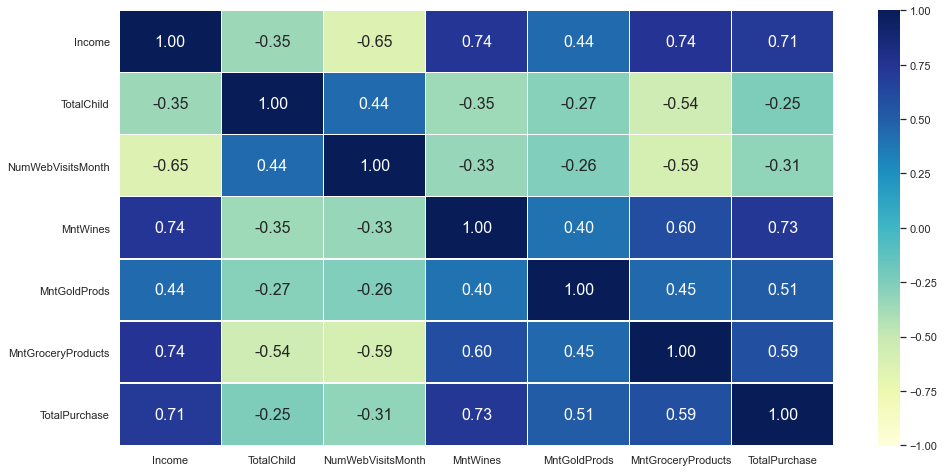

In [5]:
f = plt.figure(figsize=(16, 8))

sb.heatmap(newCustomerData[['Income','TotalChild','NumWebVisitsMonth',
                            'MntWines','MntGoldProds','MntGroceryProducts','TotalPurchase']].corr(), vmin = -1, vmax = 1, 
                            annot = True, annot_kws={"size": 16}, fmt=".2f", linewidths=.5, cmap="YlGnBu")

<Figure size 144x432 with 0 Axes>

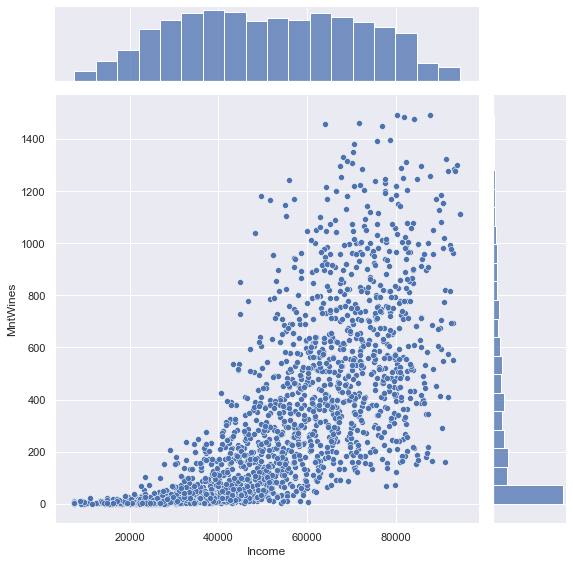

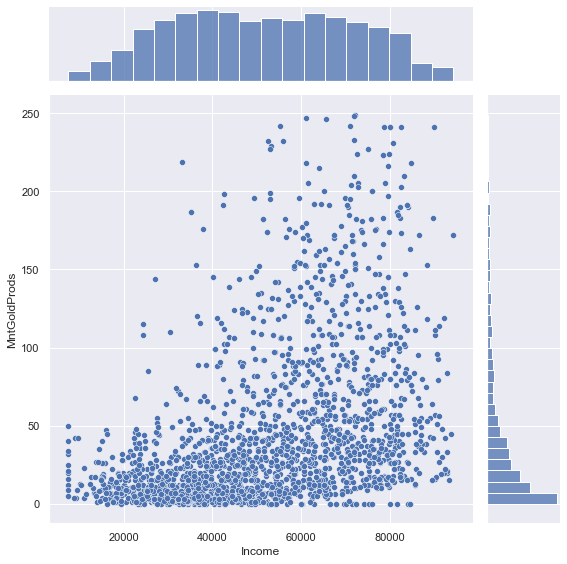

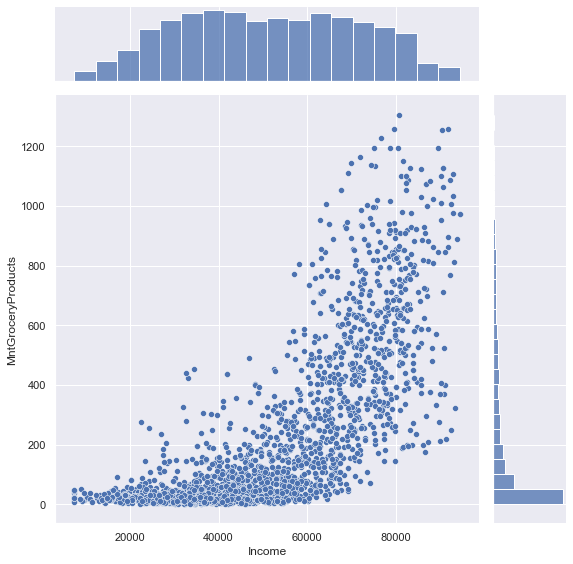

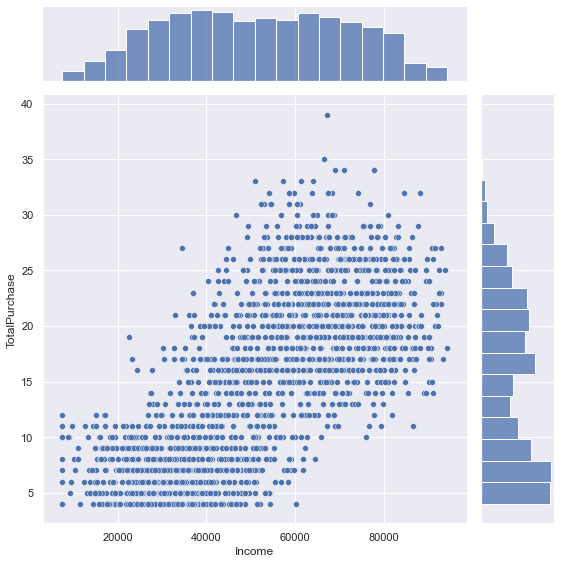

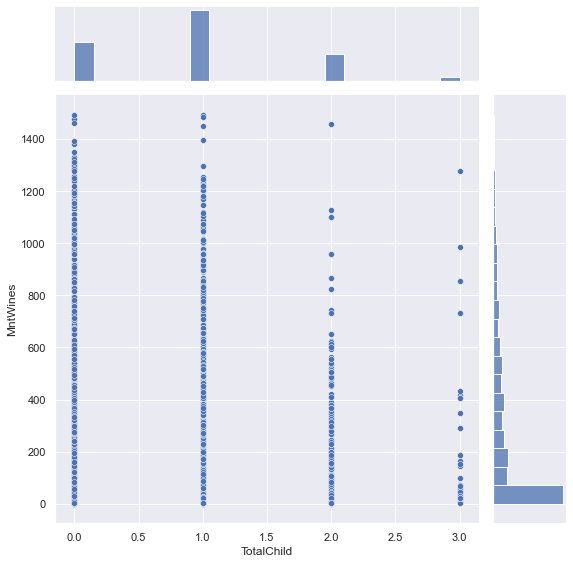

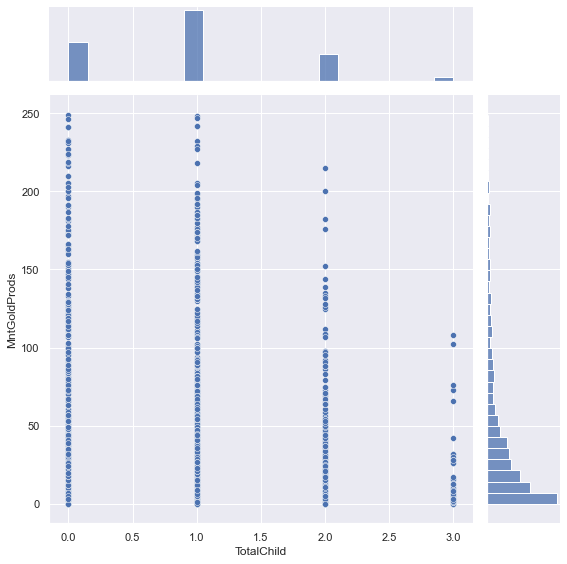

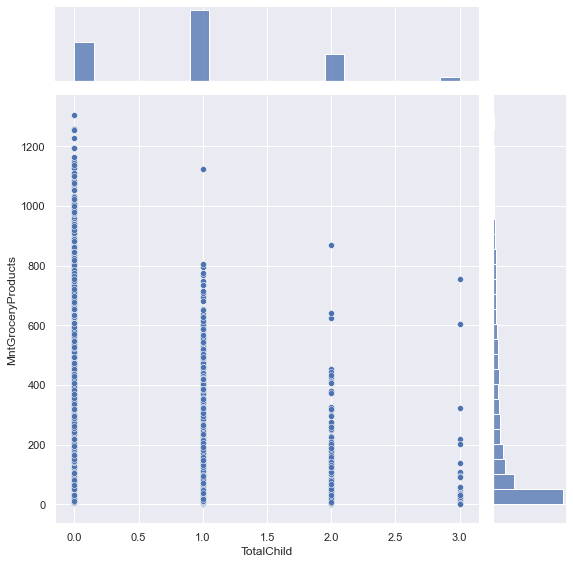

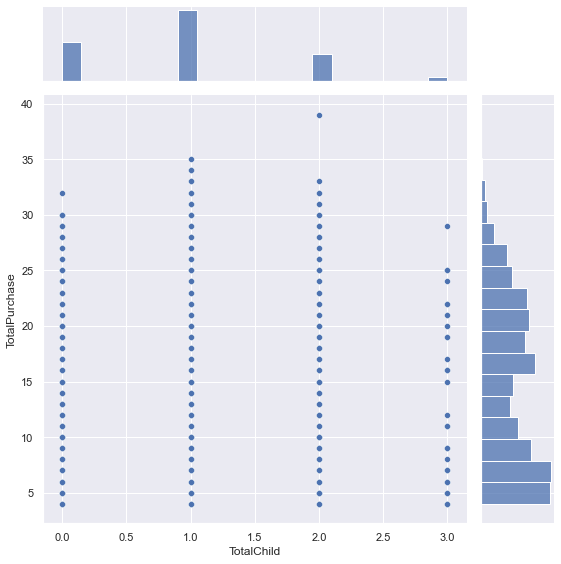

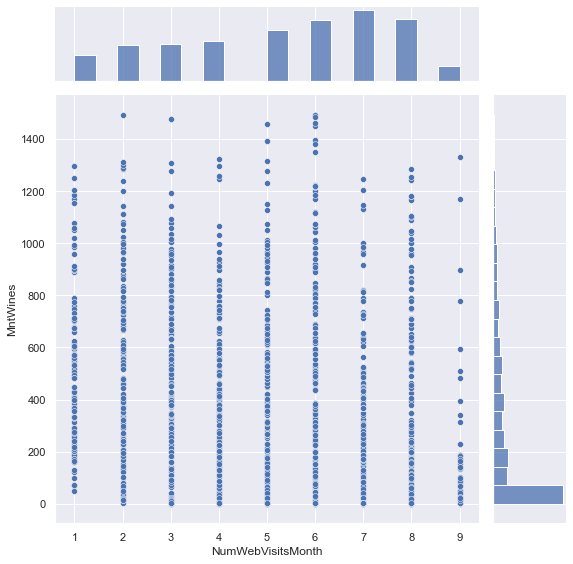

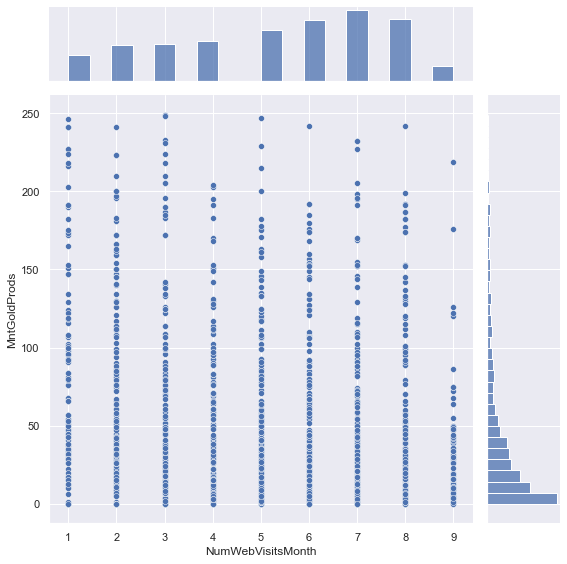

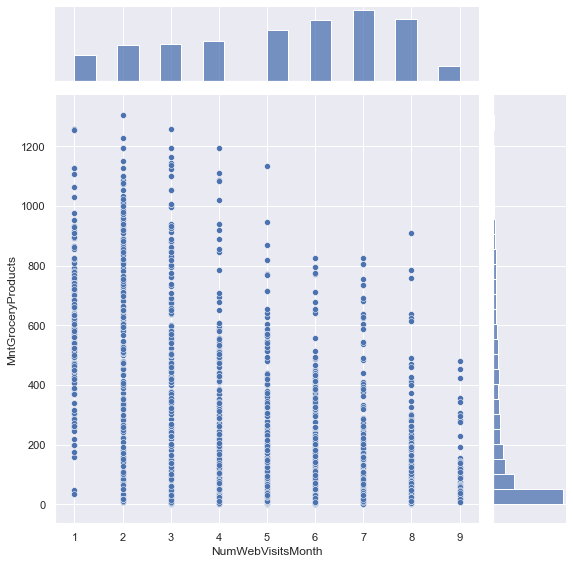

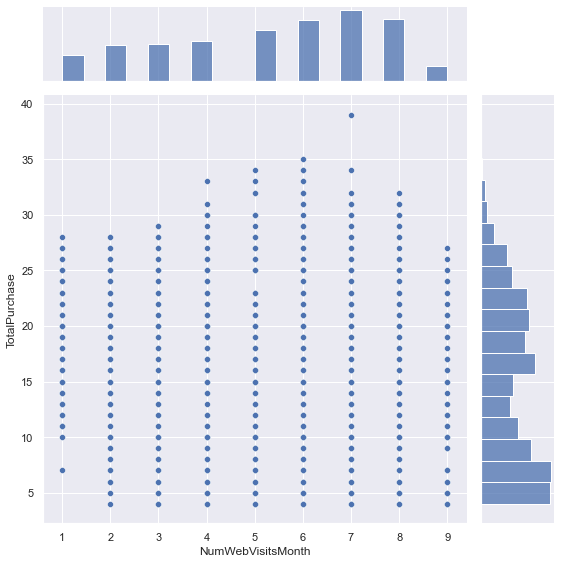

In [6]:
f = plt.figure(figsize=(2, 6))

# Predictor: Income
sb.jointplot(data = newCustomerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "TotalPurchase", height = 8)

# Predictor: TotalChild
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "TotalPurchase", height = 8)

# Predictor: NumWebVisitsMonth (can be treated as categorical variable too)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "TotalPurchase", height = 8)

# Formalizing Variable Types

In [7]:
newCustomerData['NumWebVisitsMonth'] = newCustomerData['NumWebVisitsMonth'].astype("category")
newCustomerData['YearRange'] = newCustomerData['YearRange'].astype("category")
newCustomerData['Dt_Customer'] = newCustomerData['Dt_Customer'].astype("datetime64[ns]")

KeyError: 'Dt_Customer'

In [ ]:
newCustomerData.info()

# Machine Learning

## Linear Regression

### 1a) train_test_split Method (numerical VS numerical variables)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def normal_splitting(X, Y):
    

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

In [ ]:
linreg1 = LinearRegression()
linreg1.fit(X_train, Y_train)

print('Intercept \t: b = ', linreg1.intercept_)
print('Coefficients \t: a = ', linreg1.coef_)

regline_x = X_train
regline_y = linreg1.intercept_ + linreg1.coef_ * X_train

# Predict Response corresponding to Predictors
Y_train_pred = linreg1.predict(X_train)
Y_test_pred = linreg1.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(X_train, Y_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'red', linewidth = 6)
axes[0].set_title("Regression Line on Train Set")

axes[1].scatter(X_test, Y_test, color = "green")
axes[1].scatter(X_test, Y_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")

for ax in axes.flat:
    ax.set(xlabel='Income', ylabel='MntGroceryProducts')

# Alternative:
# plt.subplot(1, 2, 1)
# plt.scatter(X_train, Y_train, color = "blue")
# plt.plot(regline_x, regline_y, 'red', linewidth = 6)
# plt.title("Regression Line on Train Set")
# plt.xlabel("Income")
# plt.ylabel("MntGroceryProducts")

# plt.subplot(1, 2, 2)
# plt.scatter(X_test, Y_test, color = "green")
# plt.scatter(X_test, Y_test_pred, color = "red")
# plt.title("Model Prediction on Test Set")
# plt.xlabel("Income")
# plt.ylabel("MntGroceryProducts")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
totalPurchases = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
income = pd.DataFrame(newCustomerData['Income']) # Predictor

# Split the Dataset into random Train and Test
income_train, income_test, totalPurchases_train, totalPurchases_test = train_test_split(income, totalPurchases, test_size = 0.2)

# Check the sample sizes
print("Train Set :", income_train.shape, totalPurchases_train.shape)
print("Test Set  :", income_test.shape, totalPurchases_test.shape)

In [ ]:
linreg2 = LinearRegression()
linreg2.fit(income_train, totalPurchases_train)

print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)

regline_x = income_train
regline_y = linreg2.intercept_ + linreg2.coef_ * income_train

# Predict Response corresponding to Predictors
totalPurchases_train_pred = linreg2.predict(income_train)
totalPurchases_test_pred = linreg2.predict(income_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(income_train, totalPurchases_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'red', linewidth = 6)
axes[0].set_title("Regression Line on Train Set")

axes[1].scatter(income_test, totalPurchases_test, color = "green")
axes[1].scatter(income_test, totalPurchases_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")

for ax in axes.flat:
    ax.set(xlabel='Income', ylabel='TotalPurchase')
    
# Alternative:
# plt.subplot(1, 2, 1)
# plt.scatter(income_train, totalPurchases_train, color = "blue")
# plt.plot(regline_x, regline_y, 'red', linewidth = 6)
# plt.title("Regression Line on Train Set")
# plt.xlabel("Income")
# plt.ylabel("TotalPurchase")

# plt.subplot(1, 2, 2)
# plt.scatter(income_test, totalPurchases_test, color = "green")
# plt.scatter(income_test, totalPurchases_test_pred, color = "red")
# plt.title("Model Prediction on Test Set")
# plt.xlabel("Income")
# plt.ylabel("TotalPurchase")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_train, totalPurchases_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_test, totalPurchases_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()

### 1b) train_test_split Method (numerical VS categorical variables)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth']) # Predictor (Categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor (Numerical)
# income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred)
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth']) # Predictor (Categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor (numerical)
# income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred)
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGoldProds']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntWines']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntMeatProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntFishProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntSweetProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntFruits']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

### 2) K-Fold Method 

In [ ]:
newCustomerData.info()

In [ ]:
train_data = pd.read_csv('dataset/new_train_data.csv')
test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
train_data.drop(dropColumn,inplace= True,axis = 1)
test_data.drop(dropColumn,inplace= True,axis = 1)

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [ ]:
train_data['NumWebVisitsMonth'].describe()

In [ ]:
test_data['NumWebVisitsMonth'].describe()

In [25]:
newCustomerData['NumWebVisitsMonth'].describe()

count     2166
unique       9
top          7
freq       386
Name: NumWebVisitsMonth, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

MODEL = LinearRegression()

def concatenator(cat_train, num_train):
    return pd.concat([cat_train, num_train], axis=1)

def encoder(splitted_data):
    return pd.get_dummies(data=splitted_data, drop_first=True)

def print_train_test(X_train, X_test, Y_train, Y_test):
    print("Train Set :", X_train.shape, Y_train.shape)
    print("Test Set  :", X_test.shape, Y_test.shape)

def univariate_kfold_linreg(train_response, train_predictor, var_type):
    Y_train = pd.DataFrame(train_response) # Response
    X_train = pd.DataFrame(train_predictor) # Predictor (Categorical)

    if var_type == "categorical":
        print(var_type)
        X_train = encoder(X_train)

    
    MODEL.fit(X_train,Y_train)
    return model, X_train, Y_train

def multivariate_kfold_linreg(train_response, train_cat_predictor, train_num_predictor):
    Y_train = pd.DataFrame(train_response) # Response
    cat_train = pd.DataFrame(train_cat_predictor) # Predictors (Categorical)
    num_train = pd.DataFrame(train_num_predictor) # Predictor (numercial)
    
    cat_train = encoder(cat_train)
    X_train = concatenator(cat_train, num_train) # For multi-variate linear regression with numerical predictor variable

    MODEL.fit(X_train,Y_train)
    return MODEL, X_train, Y_train

def results(model, X, Y):
    print("Model intercept: ", model.intercept_)

    predictions = model.predict(X)
    predictions

    sb.regplot(Y,predictions)

    Y_pred = model.predict(X)
     # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(X, Y))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y, Y_pred))
    print("Residual Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y, Y_pred)))
    print()

    
response_var = ["MntGroceryProducts", "TotalPurchase", "MntWines", "MntGoldProds"]
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange"]
num_predictors = ["Income", "TotalChild", "NumWebVisitsMonth"]

# print_train_test(X_train, X_test, Y_train, Y_test)
# train_data[predictors].info()
#     for col_name in Y_train.columns:
#         response = col_name
#     for col_name in cat_train.columns:
#         cat_pred = col_name
#     print("Variables: ")
#     print("Response: ", response)
#     print("Predictors: ", cat_pred + ", Income")
#     print()

In [27]:
splitted_train_data = pd.read_csv('dataset/splitted_train_data.csv')
cv_data = pd.read_csv('dataset/splitted_cv_data.csv')
new_test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
splitted_train_data.drop(dropColumn,inplace= True,axis = 1)
cv_data.drop(dropColumn,inplace= True,axis = 1)
new_test_data.drop(dropColumn,inplace= True,axis = 1)

Model intercept:  [-3522.21402622]


C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6898132546152927
Mean Squared Error (MSE) 	: 23857.687556775618
Residual Mean Squared Error (RMSE) 	: 154.45933949352371



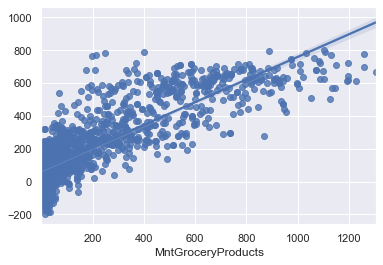

In [28]:
model, X_train, Y_train = multivariate_kfold_linreg(splitted_train_data[response_var[0]],
                                                    splitted_train_data[cat_predictors],
                                                     splitted_train_data[num_predictors])
results(model, X_train, Y_train)

Model intercept:  [-3522.21402622]


C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6929872806109255
Mean Squared Error (MSE) 	: 21228.557229973652
Residual Mean Squared Error (RMSE) 	: 145.7002307135224



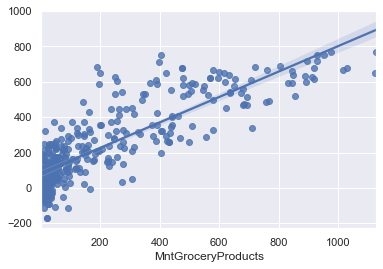

In [29]:
num_train = cv_data[num_predictors]
cat_train = encoder(cv_data[cat_predictors])
cv_X_train = concatenator(cat_train, num_train)

cv_Y_train = cv_data[response_var[0]]
results(model, cv_X_train, cv_Y_train)

Model intercept:  [-3522.21402622]


C:\Users\Muw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.652636344012288
Mean Squared Error (MSE) 	: 27323.48039496397
Residual Mean Squared Error (RMSE) 	: 165.29815605433708



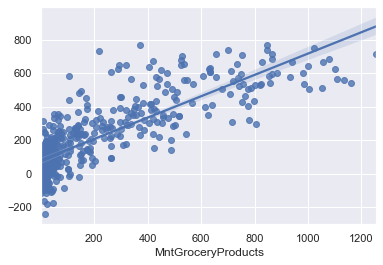

In [30]:
num_train = new_test_data[num_predictors]
cat_train = encoder(new_test_data[cat_predictors])
test_X_train = concatenator(cat_train, num_train)

test_Y_train = new_test_data[response_var[0]]
results(model, test_X_train, test_Y_train)

In [31]:
test_results(model, new_test_data, cv_data[response_var[0]])

NameError: name 'test_results' is not defined

In [32]:
test_results(model, X_test, cv_data[response_var[0]])

NameError: name 'test_results' is not defined

In [33]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[0]], test_data[response_var[0]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

NameError: name 'train_data' is not defined

In [34]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[1]], test_data[response_var[1]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

NameError: name 'train_data' is not defined

In [35]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[2]], test_data[response_var[2]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

NameError: name 'train_data' is not defined

In [36]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[3]], test_data[response_var[3]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

NameError: name 'train_data' is not defined

In [37]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[0]], test_data[response_var[0]], 
             train_data[num_predictors[0]], test_data[num_predictors[0]], "numerical")

NameError: name 'train_data' is not defined

In [38]:
splitted_train_data = pd.read_csv('dataset/splitted_train_data.csv')
cv_data = pd.read_csv('dataset/splitted_cv_data.csv')
new_test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
splitted_train_data.drop(dropColumn,inplace= True,axis = 1)
cv_data.drop(dropColumn,inplace= True,axis = 1)
new_test_data.drop(dropColumn,inplace= True,axis = 1)

In [39]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(splitted_train_data[response_var[0]], cv_data[response_var[0]], 
                     splitted_train_data[num_predictors[0]], cv_data[num_predictors[0]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [40]:
model, X_train, X_test = multivariate_kfold_linreg(splitted_train_data[response_var[0]], cv_data[response_var[0]], 
splitted_train_data[cat_predictors], cv_data[cat_predictors], 
             splitted_train_data[num_predictors], cv_data[num_predictors])
results(model, X_train, X_test, splitted_train_data[response_var[0]], new_test_data[response_var[0]])

TypeError: multivariate_kfold_linreg() takes 3 positional arguments but 6 were given

## Cross Validation

### Carrying out grid-search CV: choosing the best combination of parameters

In [53]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# defining datasets
X_train = pd.read_csv('dataset/X_train_lr.csv')
Y_train = pd.read_csv('dataset/Y_train_lr.csv')
X_test = pd.read_csv('dataset/X_test_lr.csv')
Y_test = pd.read_csv('dataset/Y_train_lr.csv')

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
MODEL = LinearRegression()
MODEL.fit(X_train, Y_train)
rfe = RFE(MODEL)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)    

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013053,0.004393,0.000974,0.001225,1,{'n_features_to_select': 1},0.158279,0.083375,0.071025,0.130340,...,0.126040,0.121213,0.121153,0.121093,0.124909,0.118766,0.125242,0.123188,0.122423,0.003065
1,0.012423,0.006681,0.000584,0.000893,2,{'n_features_to_select': 2},0.166464,0.115257,0.084264,0.135465,...,0.140130,0.136121,0.134913,0.133977,0.140072,0.133669,0.140182,0.135716,0.136405,0.002971
2,0.004807,0.007349,0.004576,0.006996,3,{'n_features_to_select': 3},0.164502,0.121846,0.098406,0.144163,...,0.148489,0.145287,0.144446,0.143792,0.149144,0.142621,0.150619,0.150779,0.145461,0.005271
3,0.012502,0.006251,0.000000,0.000000,4,{'n_features_to_select': 4},0.167364,0.128109,0.129594,0.141258,...,0.162545,0.148130,0.161181,0.159108,0.151924,0.153523,0.166818,0.164886,0.155953,0.007750
4,0.011874,0.006063,0.002063,0.004633,5,{'n_features_to_select': 5},0.179072,0.130765,0.127489,0.140822,...,0.172448,0.151809,0.169747,0.168858,0.155175,0.164405,0.176215,0.166715,0.163647,0.008170
5,0.007823,0.007109,0.001763,0.004659,6,{'n_features_to_select': 6},0.193101,0.154347,0.128983,0.162621,...,0.174881,0.162979,0.172279,0.171427,0.168593,0.166600,0.178682,0.174941,0.170059,0.004951
6,0.010938,0.007161,0.001563,0.004688,7,{'n_features_to_select': 7},0.192318,0.154066,0.140093,0.161793,...,0.176647,0.163610,0.174147,0.174396,0.178526,0.168735,0.181976,0.177618,0.172903,0.005888
7,0.006548,0.008814,0.002038,0.004633,8,{'n_features_to_select': 8},0.193229,0.182808,0.143024,0.175524,...,0.177338,0.175290,0.174801,0.175688,0.179353,0.169372,0.183311,0.181672,0.176303,0.004034
8,0.010815,0.007977,0.001863,0.004674,9,{'n_features_to_select': 9},0.200113,0.193373,0.151296,0.181732,...,0.182345,0.180414,0.180445,0.181430,0.185315,0.173405,0.189216,0.187521,0.181593,0.004540
9,0.006270,0.007679,0.001666,0.004669,10,{'n_features_to_select': 10},0.199144,0.203111,0.148346,0.214588,...,0.183045,0.210217,0.210374,0.209302,0.186180,0.205515,0.189658,0.216370,0.199876,0.013502


### Visualising the results for the grid-search CV, finding that 11 is the optimal number of features

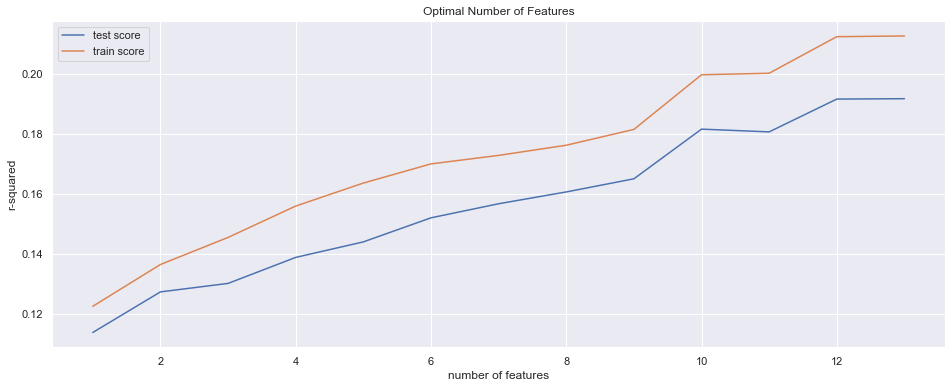

In [55]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [56]:
# final model
n_features_optimal = 11

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, y_pred)
print(r2)

NameError: name 'X_test' is not defined

## Exponential Regression (for reference)

In [64]:
X = np.array(newCustomerData['Income'])
print(X)
Y = np.array(newCustomerData['MntGroceryProducts'])
print(Y)

[58138. 46344. 71613. ... 56981. 69245. 52869.]
[806   9 287 ... 297 324  66]


In [65]:
ylog_data = np.log(Y)
print(ylog_data)
  
curve_fit = np.polyfit(X, ylog_data, 1)
print(curve_fit)

[6.69208374 2.19722458 5.65948222 ... 5.69373214 5.78074352 4.18965474]
[6.02032772e-05 1.37033299e+00]


In [ ]:
y = np.exp(1.37938297e+00) * np.exp(6.00146653e-05*X)
  
print(y)

[130.12760959  64.11655627 292.13417382 ... 121.39851102 253.4327416
  94.85015303]


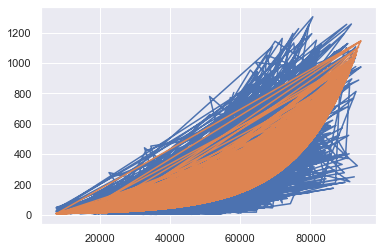

In [ ]:
# Blue 
plt.plot(X, Y)
  
# best fit in orange
plt.plot(X, y)

In [ ]:
# sample_data = pd.DataFrame(newCustomerData['NumWebVisitsMonth'])
# sample_data = sample_data.sample(n=1000,replace="False")
# sample_data.shape

In [ ]:
# newCustomerData['Income'].describe()